In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import splitfolders

2024-02-02 16:47:25.646121: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 16:47:25.646204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 16:47:26.187355: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 16:47:27.648414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-02 16:47:31.064085: W tensorflow/compiler/tf2

In [2]:
splitfolders.ratio('Test', output="output2", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 305599 files [08:49, 577.52 files/s] 


In [3]:
IMAGE_SIZE = 140
CHANNELS = 3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'output2/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        #save_to_dir="AugmentedImages"
)

Found 244408 images belonging to 200 classes.


In [5]:
train_generator.class_indices

{'10197 Technic, Axle and Pin Connector Hub with 2 Perpendicular Axles': 0,
 '10201 Bracket 1 x 2 - 1 x 4 with Rounded Corners': 1,
 '10247 Plate Special 2 x 2 with 1 Pin Hole [Complete Underside Rib]': 2,
 '10314 Slope, Curved 1 x 4 x 1 13': 3,
 '10928 Technic, Gear 8 Tooth with Dual Face': 4,
 '11090 Bar Holder with Clip': 5,
 '11153 Slope, Curved 4 x 1': 6,
 '11211 Brick, Modified 1 x 2 with Studs on 1 Side': 7,
 '11212 Plate 3 x 3': 8,
 '11213 Plate, Round 6 x 6 with Hole': 9,
 '11214 Technic, Axle 1L with Pin 2L with Friction Ridges': 10,
 '11215 Bracket 5 x 2 x 1 13 with 2 Holes': 11,
 '11272 Technic, Axle Connector 2 x 3 Quadruple': 12,
 '11458 Plate, Modified 1 x 2 with Pin Hole on Top': 13,
 '11476 Plate, Modified 1 x 2 with Clip on Side (Horizontal Grip)': 14,
 '11477 Slope Curved 2 x 1 No Studs [12 Bow]': 15,
 '11478 Technic, Liftarm Thin 1 x 5 - Axle Holes': 16,
 '13349 Wedge 4 x 4 Triple Inverted with Connections between 4 Studs': 17,
 '13547 Slope, Curved 4 x 1 Inverted':

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['10197 Technic, Axle and Pin Connector Hub with 2 Perpendicular Axles',
 '10201 Bracket 1 x 2 - 1 x 4 with Rounded Corners',
 '10247 Plate Special 2 x 2 with 1 Pin Hole [Complete Underside Rib]',
 '10314 Slope, Curved 1 x 4 x 1 13',
 '10928 Technic, Gear 8 Tooth with Dual Face',
 '11090 Bar Holder with Clip',
 '11153 Slope, Curved 4 x 1',
 '11211 Brick, Modified 1 x 2 with Studs on 1 Side',
 '11212 Plate 3 x 3',
 '11213 Plate, Round 6 x 6 with Hole',
 '11214 Technic, Axle 1L with Pin 2L with Friction Ridges',
 '11215 Bracket 5 x 2 x 1 13 with 2 Holes',
 '11272 Technic, Axle Connector 2 x 3 Quadruple',
 '11458 Plate, Modified 1 x 2 with Pin Hole on Top',
 '11476 Plate, Modified 1 x 2 with Clip on Side (Horizontal Grip)',
 '11477 Slope Curved 2 x 1 No Studs [12 Bow]',
 '11478 Technic, Liftarm Thin 1 x 5 - Axle Holes',
 '13349 Wedge 4 x 4 Triple Inverted with Connections between 4 Studs',
 '13547 Slope, Curved 4 x 1 Inverted',
 '13548 Wedge 2 x 2 (Slope 45 Corner)',
 '13731 Slope, Curved

In [7]:
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.9921569  1.         0.9803922 ]
  [0.9921569  0.9986438  0.98717344]
  [0.9921569  0.9974227  0.99865586]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.9921569  1.         0.9803922 ]
  [0.9921569  0.9983367  0.9887093 ]
  [0.9921569  0.99772984 0.9983487 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.9921569  1.         0.9803922 ]
  [0.9921569  0.9980295  0.9902451 ]
  [0.9921569  0.998037   0.99804157]]

 ...

 [[0.9941154  1.         0.98627687]
  [0.9941079  0.9980491  0.99408835]
  [0.9960785  0.9960785  1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.99380827 1.         0.986584  ]
  [0.9944151  0.9977419  0.99500984]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'output2/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 30473 images belonging to 200 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
        'output2/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 30718 images belonging to 200 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.619336   0.6075713  0.6350223 ]
  [0.61688125 0.60511655 0.6325675 ]
  [0.61442643 0.6026617  0.6301127 ]
  ...
  [0.60898817 0.6050666  0.628596  ]
  [0.6128614  0.6089398  0.63246924]
  [0.61883134 0.61490977 0.6384392 ]]

 [[0.6122299  0.6004652  0.62791616]
  [0.6146847  0.60292    0.630371  ]
  [0.61713946 0.60537475 0.63282573]
  ...
  [0.60960186 0.6056803  0.62920976]
  [0.6134751  0.6095535  0.6330829 ]
  [0.62067246 0.6167509  0.6402803 ]]

 [[0.6161729  0.6044082  0.6318592 ]
  [0.6143318  0.6025671  0.63001806]
  [0.6124907  0.600726   0.628177  ]
  ...
  [0.6102156  0.60629404 0.62982345]
  [0.61408883 0.61016726 0.6336967 ]
  [0.6225136  0.618592   0.64212143]]

 ...

 [[0.6846288  0.6924719  0.73953074]
  [0.6807555  0.68859863 0.73565745]
  [0.68307894 0.6909221  0.7379809 ]
  ...
  [0.661196   0.67688227 0.7200195 ]
  [0.6605823  0.6762686  0.71940583]
  [0.65996855 0.6756548  0.7187921 ]]

 [[0.68401504 0.6918582  0.738917  ]
  [0.68014175 0.6879849  0.73504376]


In [16]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 200

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 138, 138, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 69, 69, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 67, 67, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 33, 33, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 64)       

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=7637,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=950,
    verbose=1,
    epochs=70,
)

Epoch 1/70
7637/7637 [==============================] - 1383s 181ms/step - loss: 3.5709 - accuracy: 0.1824 - val_loss: 2.6283 - val_accuracy: 0.3228
Epoch 2/70
7637/7637 [==============================] - 1381s 181ms/step - loss: 2.3612 - accuracy: 0.3800 - val_loss: 2.2146 - val_accuracy: 0.4106
Epoch 3/70
7637/7637 [==============================] - 1391s 182ms/step - loss: 2.0715 - accuracy: 0.4405 - val_loss: 1.9617 - val_accuracy: 0.4653
Epoch 4/70
7637/7637 [==============================] - 1381s 181ms/step - loss: 1.9220 - accuracy: 0.4738 - val_loss: 1.8851 - val_accuracy: 0.4840
Epoch 5/70
7637/7637 [==============================] - 1383s 181ms/step - loss: 1.8133 - accuracy: 0.4979 - val_loss: 1.7643 - val_accuracy: 0.5156
Epoch 6/70
7637/7637 [==============================] - 1382s 181ms/step - loss: 1.7374 - accuracy: 0.5176 - val_loss: 1.7804 - val_accuracy: 0.5053
Epoch 7/70
7637/7637 [==============================] - 1381s 181ms/step - loss: 1.6538 - accuracy: 0.5365

In [20]:
scores = model.evaluate(test_generator)

960/960 [==============================] - 160s 166ms/step - loss: 1.0537 - accuracy: 0.6879


In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

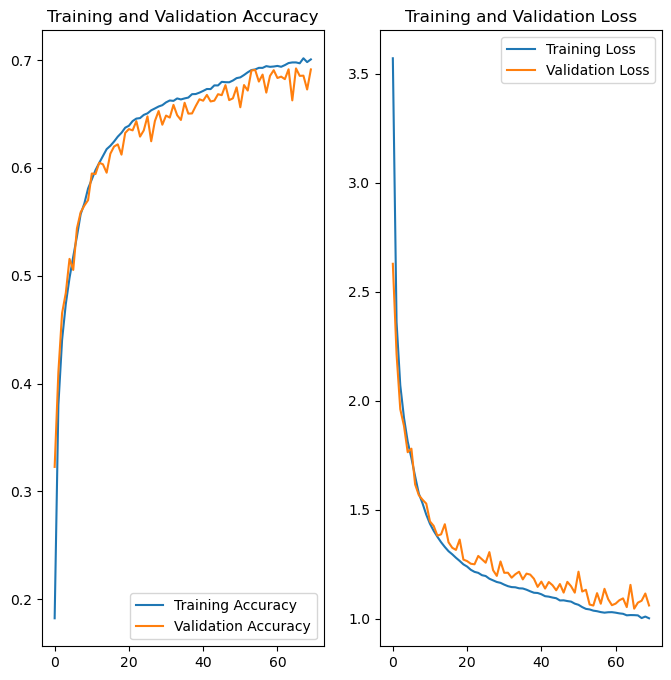

In [22]:
EPOCHS = 70

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: 6020 Bar 7 x 3 with 2 Clips (Ladder)
1/1 [==============================] - 0s 97ms/step
predicted label: 6020 Bar 7 x 3 with 2 Clips (Ladder)


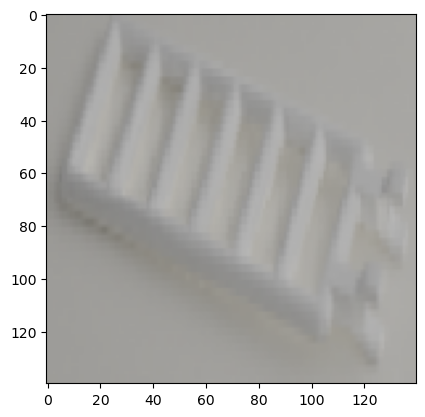

In [23]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [25]:
import os
model_version="200Bricks"
model.save(f"./Models/{model_version}")

INFO:tensorflow:Assets written to: ./Models/200Bricks/assets


INFO:tensorflow:Assets written to: ./Models/200Bricks/assets
